<a href="https://colab.research.google.com/github/2303A52329-45/2303A52329_B-45-AIML/blob/main/AIML_LAb_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

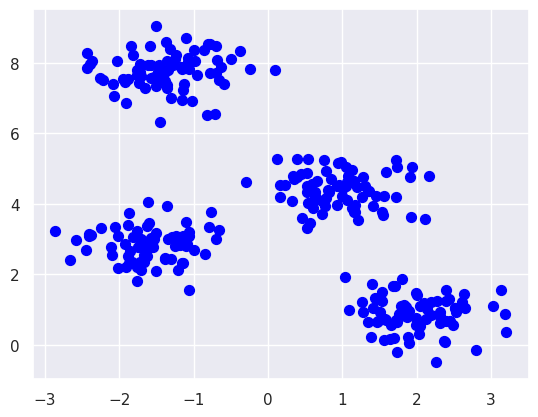

In [7]:
from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.50,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50,color='blue');

In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)

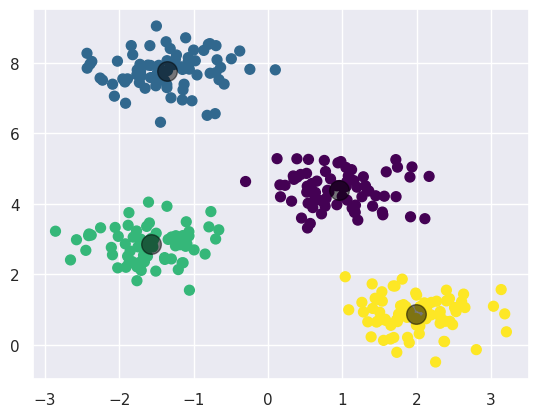

In [13]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);

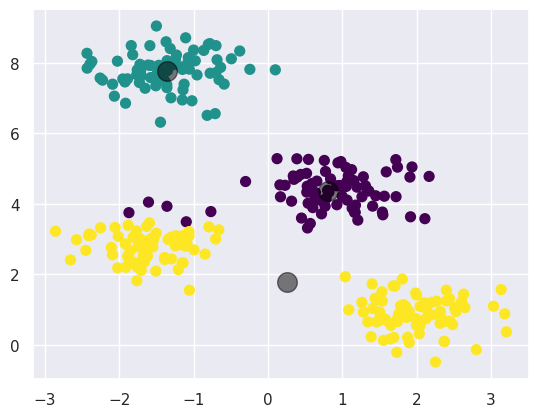

In [17]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(x.shape[0])[:n_clusters]
    centers=x[i]
    while True:
        labels=pairwise_distances_argmin(x,centers)
        new_centers=np.array([x[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels
centers,labels=find_clusters(x,3)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);

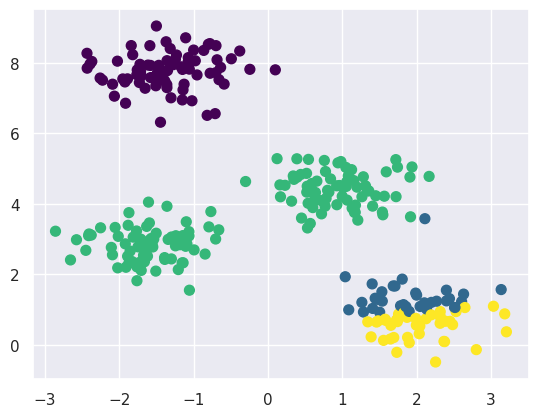

In [20]:
centers,labels=find_clusters(x,4,rseed=0)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

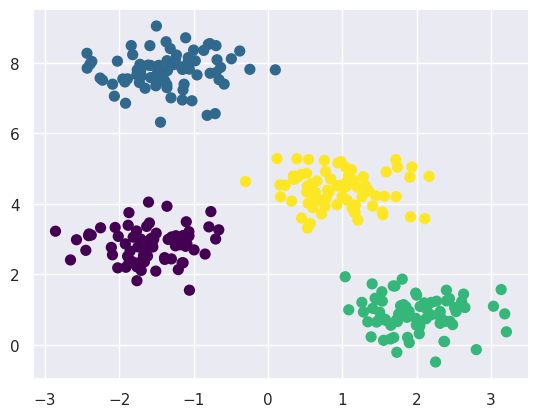

In [19]:
labels=KMeans(n_clusters=4).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

In [21]:
from sklearn.datasets import make_moons
x,y=make_moons(200,noise=0.05,random_state=0)

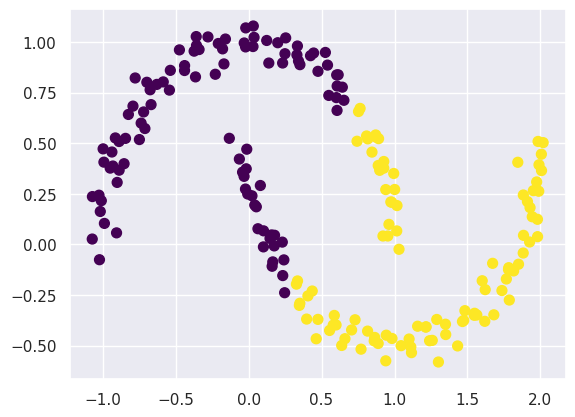

In [22]:
labels=KMeans(n_clusters=2,random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


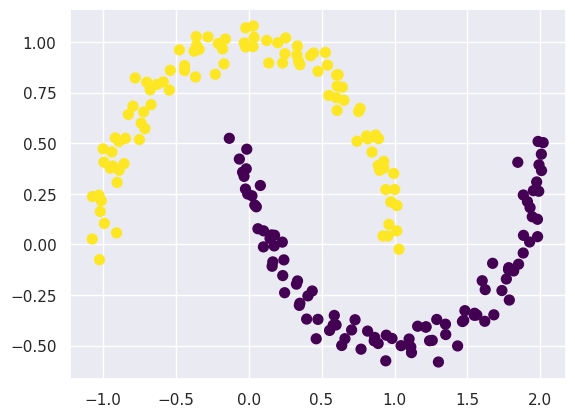

In [26]:
from sklearn.cluster import SpectralClustering
model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels=model.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

In [32]:
from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
x=x[:,::-1]

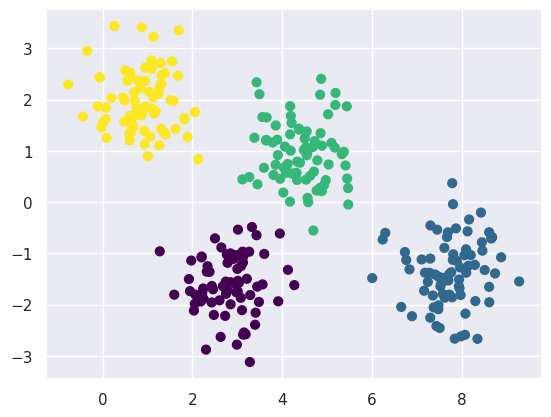

In [33]:
from sklearn.cluster import KMeans
labels=KMeans(n_clusters=4).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=40,cmap='viridis');

In [29]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [41]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
               edgecolor='k', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3,
                                 alpha=0.5, zorder=1))

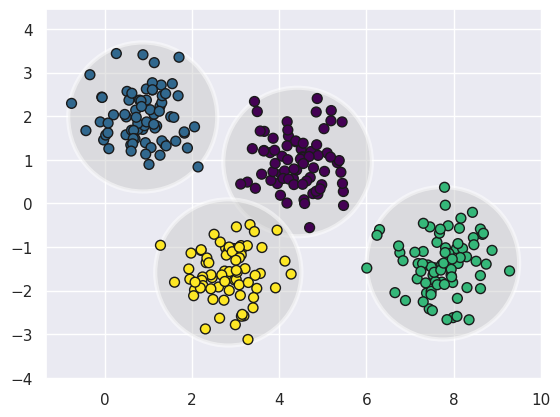

In [43]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, x)

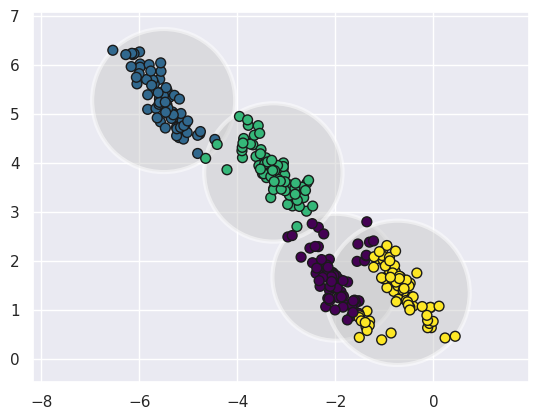

In [45]:
rng = np.random.RandomState(13)                      # Setting the random seed to 13 for reproducibility of the results
x_stretched = np.dot(x, rng.randn(2, 2))              # Applying a linear transformation (stretching) to the data X using a random matrix (2x2)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)  # Initializing KMeans with 4 clusters, random seed, and 10 initializations
plot_kmeans(kmeans, x_stretched)                        # Calling the plot_kmeans function to plot the clusters for the stretched data (X_stretched)

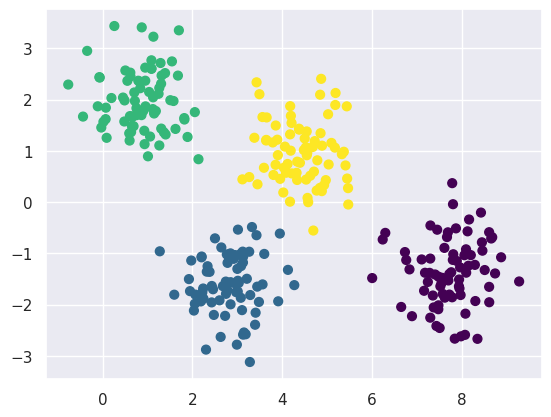

In [47]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4).fit(x)
labels=gmm.predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=40,cmap='viridis');

In [49]:
probs=gmm.predict_proba(x)
print(probs[:5].round(3))

[[0.    0.002 0.972 0.026]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.999 0.001]]


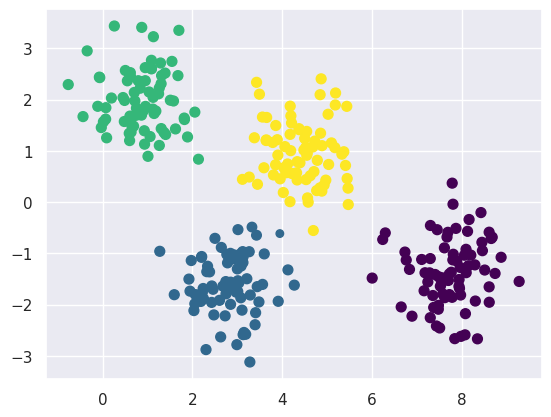

In [51]:
size=probs.max(1)/0.02
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis',s=size);